### We are trying to predict missing 'Monthlncome' data from the HR Salary dataset... Without separating the model into training and test sets with its own data...

In [1]:
import pandas as pd 
pd.set_option('display.max_columns',100)

### EDA (Explatory Data Analysis)

In [2]:
hr=pd.read_excel('hr.xlsx')

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1205 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
hr.isnull().sum().sort_values(ascending=False)

Attrition                   265
MonthlyIncome               265
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
Age                           0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInCurrentRole            0
YearsSinceLastPromotion       0
StandardHours                 0
MaritalStatus                 0
JobSatisfaction               0
JobRole                       0
JobLevel                      0
JobInvolvement                0
HourlyRate                    0
Gender                        0
EnvironmentSatisfaction       0
EmployeeNumber                0
EmployeeCount                 0
EducationField                0
Education                     0
DistanceFromHome              0
Departme

In [5]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1205.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6523.930290,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4756.215086,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4936.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8237.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
hr.MaritalStatus.nunique()

3

In [8]:
hr.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [9]:
hr.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

### Regrssion

In [10]:
miss=hr.isnull().sum()

In [11]:
miss[miss>0]                 ## we only see empty data

Attrition        265
MonthlyIncome    265
dtype: int64

In [12]:
data=hr.copy()              ## We make changes to the data

In [13]:
del data['Attrition']      

In [14]:
data.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               265
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [15]:
missing=data[data['MonthlyIncome'].isnull()]

In [16]:
missing

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
367,50,Travel_Rarely,1046,Research & Development,10,3,Technical Degree,1,491,4,Male,100,2,3,Healthcare Representative,4,Single,NaN,2755,6,Y,No,15,3,4,80,0,20,2,3,4,3,1,3
368,40,Travel_Rarely,575,Sales,22,2,Marketing,1,492,3,Male,68,2,2,Sales Executive,3,Married,NaN,6110,2,Y,Yes,12,3,1,80,2,8,6,3,6,4,1,0
369,31,Travel_Rarely,408,Research & Development,9,4,Life Sciences,1,493,3,Male,42,2,1,Research Scientist,2,Single,NaN,7551,0,Y,Yes,16,3,4,80,0,3,5,3,2,2,2,2
370,21,Travel_Rarely,156,Sales,12,3,Life Sciences,1,494,3,Female,90,4,1,Sales Representative,2,Single,NaN,25422,1,Y,No,15,3,4,80,0,1,0,3,1,0,0,0
371,29,Travel_Rarely,1283,Research & Development,23,3,Life Sciences,1,495,4,Male,54,3,1,Research Scientist,4,Single,NaN,18168,9,Y,No,16,3,4,80,0,6,4,3,3,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461,50,Travel_Rarely,410,Sales,28,3,Marketing,1,2055,4,Male,39,2,3,Sales Executive,1,Divorced,NaN,16586,4,Y,Yes,13,3,2,80,1,20,3,3,3,2,2,0
1462,39,Travel_Rarely,722,Sales,24,1,Marketing,1,2056,2,Female,60,2,4,Sales Executive,4,Married,NaN,8828,0,Y,No,11,3,1,80,1,21,2,2,20,9,9,6
1463,31,Non-Travel,325,Research & Development,5,3,Medical,1,2057,2,Male,74,3,2,Manufacturing Director,1,Single,NaN,3787,0,Y,No,19,3,2,80,0,10,2,3,9,4,1,7
1464,26,Travel_Rarely,1167,Sales,5,3,Other,1,2060,4,Female,30,2,1,Sales Representative,3,Single,NaN,21378,0,Y,No,18,3,4,80,0,5,2,3,4,2,0,0


In [17]:
filled=data[data['MonthlyIncome'].notnull()]

In [18]:
filled

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1439,36,Travel_Rarely,557,Sales,3,3,Medical,1,2024,1,Female,94,2,3,Sales Executive,4,Married,7644.0,12695,0,Y,No,19,3,3,80,2,10,2,3,9,7,3,4
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991.0,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142.0,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390.0,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [19]:
missing.shape,filled.shape

((265, 34), (1205, 34))

In [20]:
filled.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.017555,0.003074,0.215022,NaN,-0.030078,0.017511,0.010490,0.026380,0.524683,-0.002142,0.504376,0.030861,0.281257,-0.007668,-0.017728,0.054784,NaN,0.007166,0.678289,-0.007230,-0.032737,0.323413,0.209129,0.221807,0.214771
DailyRate,0.017555,1.000000,0.005963,-0.014068,NaN,-0.047483,0.035487,0.015392,0.027986,0.002527,0.024612,0.009597,-0.034968,0.038203,0.029811,0.000068,-0.010120,NaN,0.052685,0.005077,-0.019137,-0.058334,-0.043150,0.010441,-0.034099,-0.028570
DistanceFromHome,0.003074,0.005963,1.000000,0.035379,NaN,0.020763,-0.030170,0.027519,0.033623,0.006032,-0.005838,-0.009285,0.045875,-0.016143,0.039423,0.028285,0.013337,NaN,0.062579,0.017436,-0.033804,-0.016886,0.007022,0.023506,0.014140,0.014597
Education,0.215022,-0.014068,0.035379,1.000000,NaN,0.045023,-0.024908,-0.006329,0.066902,0.103864,-0.014474,0.095758,-0.029582,0.125083,-0.019455,-0.029513,-0.015992,NaN,-0.004353,0.157465,-0.016219,0.012274,0.079556,0.067478,0.062813,0.081593
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.030078,-0.047483,0.020763,0.045023,NaN,1.000000,0.028064,-0.004309,0.006398,-0.019065,-0.041587,-0.015974,0.008877,-0.017408,-0.024460,-0.046639,-0.085285,NaN,0.044376,-0.022418,0.016559,0.014841,-0.010650,-0.011192,-0.003753,-0.012552
EnvironmentSatisfaction,0.017511,0.035487,-0.030170,-0.024908,NaN,0.028064,1.000000,-0.046590,-0.013060,-0.003212,0.000359,-0.005332,0.031333,0.006870,-0.046696,-0.041666,-0.001946,NaN,0.003917,-0.004758,-0.015246,0.036916,0.000836,0.023155,0.016795,-0.010579
HourlyRate,0.010490,0.015392,0.027519,-0.006329,NaN,-0.004309,-0.046590,1.000000,0.041263,-0.019858,-0.058157,-0.010333,-0.026831,0.026877,-0.002272,0.007760,-0.001814,NaN,0.038181,-0.008770,-0.010727,-0.004388,-0.032050,-0.041045,-0.033828,-0.034277
JobInvolvement,0.026380,0.027986,0.033623,0.066902,NaN,0.006398,-0.013060,0.041263,1.000000,-0.014145,-0.017064,-0.019477,-0.026837,0.019130,-0.005307,-0.019707,0.027719,NaN,0.039984,-0.003143,-0.019101,-0.015039,-0.011509,0.014308,-0.008718,0.034495
JobLevel,0.524683,0.002527,0.006032,0.103864,NaN,-0.019065,-0.003212,-0.019858,-0.014145,1.000000,-0.013625,0.951287,0.031863,0.135199,-0.029989,-0.022727,0.035728,NaN,0.001562,0.791560,-0.003407,0.033094,0.547500,0.390848,0.364095,0.388201


In [21]:
abs(filled.corr()['MonthlyIncome']).sort_values(ascending=False)

MonthlyIncome               1.000000
JobLevel                    0.951287
TotalWorkingYears           0.780438
YearsAtCompany              0.527649
Age                         0.504376
YearsInCurrentRole          0.365401
YearsWithCurrManager        0.357689
YearsSinceLastPromotion     0.350071
NumCompaniesWorked          0.138344
Education                   0.095758
RelationshipSatisfaction    0.035059
PercentSalaryHike           0.023454
MonthlyRate                 0.023419
WorkLifeBalance             0.020497
JobInvolvement              0.019477
EmployeeNumber              0.015974
JobSatisfaction             0.013752
PerformanceRating           0.012966
HourlyRate                  0.010333
DailyRate                   0.009597
DistanceFromHome            0.009285
TrainingTimesLastYear       0.006785
EnvironmentSatisfaction     0.005332
StockOptionLevel            0.002759
EmployeeCount                    NaN
StandardHours                    NaN
Name: MonthlyIncome, dtype: float64

In [22]:
from scipy import stats

In [23]:
est=stats.linregress(x=filled['TotalWorkingYears'],y=filled['MonthlyIncome'])    ##  TotalWorkingYears  0.780438 etkilediği için acaba sadece onu ele alsak MonthlyIncome tahmini yapmak için yeterli olur mu diye bakıyoruz...

In [24]:
est

LinregressResult(slope=472.69814660329973, intercept=1187.7370222035797, rvalue=0.7804379598380538, pvalue=1.2815494054488638e-247, stderr=10.91829318795265, intercept_stderr=150.12148601790048)

In [25]:
est.slope  

472.69814660329973

In [26]:
est.intercept 

1187.7370222035797

In [27]:
def predict(x):
    return est.slope*x + est.intercept

In [28]:
predict(2)

2133.1333154101794

In [29]:
from sklearn.metrics import r2_score,mean_squared_error

In [30]:
r2_score(filled['MonthlyIncome'],predict(filled.TotalWorkingYears))

0.6090834091561835

In [31]:
mean_squared_error(filled['MonthlyIncome'],filled['TotalWorkingYears'].apply(predict))**.5

2972.5095419789172

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

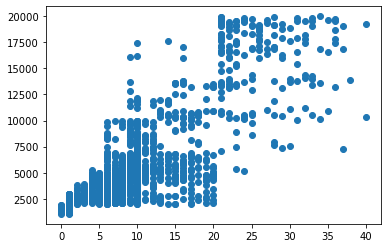

In [33]:
plt.scatter(filled['TotalWorkingYears'],filled['MonthlyIncome'])

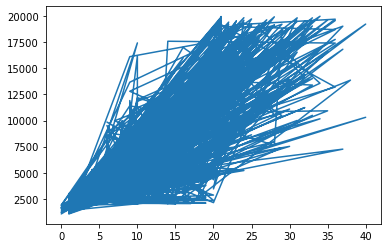

In [34]:
plt.plot(filled['TotalWorkingYears'],filled['MonthlyIncome'])

In [35]:
filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1205 non-null   int64  
 1   BusinessTravel            1205 non-null   object 
 2   DailyRate                 1205 non-null   int64  
 3   Department                1205 non-null   object 
 4   DistanceFromHome          1205 non-null   int64  
 5   Education                 1205 non-null   int64  
 6   EducationField            1205 non-null   object 
 7   EmployeeCount             1205 non-null   int64  
 8   EmployeeNumber            1205 non-null   int64  
 9   EnvironmentSatisfaction   1205 non-null   int64  
 10  Gender                    1205 non-null   object 
 11  HourlyRate                1205 non-null   int64  
 12  JobInvolvement            1205 non-null   int64  
 13  JobLevel                  1205 non-null   int64  
 14  JobRole 

### Multi-Variable Regression

In [36]:
filled.select_dtypes(exclude='number').head()   # Sadece Category(object,category) sütunlarını alıyoruz

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [37]:
filled.select_dtypes(exclude='number').nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [38]:
x=pd.get_dummies(filled,drop_first=True)

In [39]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1205 non-null   int64  
 1   DailyRate                          1205 non-null   int64  
 2   DistanceFromHome                   1205 non-null   int64  
 3   Education                          1205 non-null   int64  
 4   EmployeeCount                      1205 non-null   int64  
 5   EmployeeNumber                     1205 non-null   int64  
 6   EnvironmentSatisfaction            1205 non-null   int64  
 7   HourlyRate                         1205 non-null   int64  
 8   JobInvolvement                     1205 non-null   int64  
 9   JobLevel                           1205 non-null   int64  
 10  JobSatisfaction                    1205 non-null   int64  
 11  MonthlyIncome                      1205 non-null   float

In [40]:
x.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,4,5993.0,19479,8,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,2,5130.0,24907,1,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,3,2090.0,2396,6,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,3,2909.0,23159,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,2,3468.0,16632,9,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


### Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
L=LinearRegression()

In [43]:
L.fit(x.drop(['MonthlyIncome'],axis=1),x.MonthlyIncome)

LinearRegression()

In [44]:
pred=L.predict(x.drop(['MonthlyIncome'],axis=1))

In [45]:
pred

array([5847.45618524, 5262.40598848, 2850.2655657 , ..., 5753.87104662,
       6309.93005008, 5148.0137686 ])

In [46]:
r2_score(x['MonthlyIncome'],pred)

0.9478332054077498

In [47]:
(mean_squared_error(x['MonthlyIncome'],pred))**.5

1085.8711186054825

### Ridge

In [48]:
from sklearn.linear_model import Ridge,Lasso 

In [49]:
R=Ridge()
R.fit(x.drop(['MonthlyIncome'],axis=1),x.MonthlyIncome)
y_pred_ridge=R.predict(x.drop(['MonthlyIncome'],axis=1))
y_pred_ridge

array([5834.2605767 , 5293.95505142, 2841.37636749, ..., 5745.39839116,
       6293.44689497, 5179.32147099])

In [50]:
(mean_squared_error(x['MonthlyIncome'],y_pred_ridge))**0.5

1086.4423647219962

In [51]:
r2_score(x['MonthlyIncome'],y_pred_ridge)

0.9477783040169663

### Lasso

In [52]:
L=Lasso()
L.fit(x.drop(['MonthlyIncome'],axis=1),x.MonthlyIncome)
y_pred_lasso=L.predict(x.drop(['MonthlyIncome'],axis=1))
y_pred_lasso

array([5838.04526217, 5282.75698619, 2850.17701723, ..., 5759.48077923,
       6283.52364002, 5175.74899137])

In [53]:
(mean_squared_error(x['MonthlyIncome'],y_pred_lasso))**0.5

1086.4307962617843

In [54]:
r2_score(x['MonthlyIncome'],y_pred_lasso)

0.9477794161263895

### ElasticNet

In [55]:
from sklearn.linear_model import ElasticNet
E=ElasticNet(l1_ratio=0.8)
E.fit(x.drop(['MonthlyIncome'],axis=1),x.MonthlyIncome)
y_pred_elastic=E.predict(x.drop(['MonthlyIncome'],axis=1))
y_pred_elastic

array([5505.82254365, 5628.18822874, 3078.08976313, ..., 5610.62224264,
       6977.82935502, 5234.02858269])

In [56]:
(mean_squared_error(x['MonthlyIncome'],y_pred_elastic))**0.5

1515.1739120877348

In [57]:
r2_score(x['MonthlyIncome'],y_pred_elastic)

0.8984306773719457

### ExtraTreeRegressor

In [58]:
from sklearn.tree import ExtraTreeRegressor

In [59]:
ETR=ExtraTreeRegressor()

In [60]:
ETR.fit(x.drop(['MonthlyIncome'],axis=1),x.MonthlyIncome)

ExtraTreeRegressor()

In [61]:
y_pred_etr=ETR.predict(x.drop(['MonthlyIncome'],axis=1))

In [62]:
(mean_squared_error(x['MonthlyIncome'],y_pred_etr))**0.5

0.0

In [63]:
r2_score(x['MonthlyIncome'],y_pred_etr)

1.0

### GradientBoostingRegressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

In [65]:
GBR=GradientBoostingRegressor()

In [66]:
GBR=GBR.fit(x.drop(['MonthlyIncome'],axis=1),x.MonthlyIncome)

In [67]:
y_pred_gbr=GBR.predict(x.drop(['MonthlyIncome'],axis=1))

In [68]:
(mean_squared_error(x['MonthlyIncome'],y_pred_gbr))**0.5

821.6645049387167

In [69]:
r2_score(x['MonthlyIncome'],y_pred_gbr)

0.9701305902594698

### KNeighborsRegressor

In [70]:
from sklearn.neighbors import KNeighborsRegressor

In [71]:
est=KNeighborsRegressor(n_neighbors=10,weights='uniform')

In [72]:
model=est.fit(x.drop(['MonthlyIncome'],axis=1),x.MonthlyIncome)

In [73]:
y_pre=model.predict(x.drop(['MonthlyIncome'],axis=1))

In [74]:
(mean_squared_error(x['MonthlyIncome'],y_pre))**.5

4539.614038555915

In [75]:
r2_score(x['MonthlyIncome'],y_pre)

0.08825067891180827

### İmplementing Model

#### MonthlyIncome 265 null değer var,bunları Ridge regression ile tahmin edip dolduruyoruz.

In [76]:
missing.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 367 to 1465
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       265 non-null    int64  
 1   BusinessTravel            265 non-null    object 
 2   DailyRate                 265 non-null    int64  
 3   Department                265 non-null    object 
 4   DistanceFromHome          265 non-null    int64  
 5   Education                 265 non-null    int64  
 6   EducationField            265 non-null    object 
 7   EmployeeCount             265 non-null    int64  
 8   EmployeeNumber            265 non-null    int64  
 9   EnvironmentSatisfaction   265 non-null    int64  
 10  Gender                    265 non-null    object 
 11  HourlyRate                265 non-null    int64  
 12  JobInvolvement            265 non-null    int64  
 13  JobLevel                  265 non-null    int64  
 14  JobRole

In [77]:
del missing['MonthlyIncome']

In [78]:
x=pd.get_dummies(missing,drop_first=True)
x.shape

(265, 46)

In [79]:
predictions=R.predict(x)

In [80]:
predictions

array([ 9582.81962637,  5906.81947046,  2608.52161956,  1961.18641015,
        2757.48455941,  6235.2483267 ,  2442.1946287 ,  5617.66971933,
        9665.09401645,  6081.49533419,  2580.36737595,  5823.3031715 ,
       16592.13297282,  5878.99517001,  2161.42311726,  2780.43197202,
        2186.73913204,  8913.55479987,  2802.30863307,  2867.83745305,
        5669.39143299,  2337.7756757 ,  6337.6120807 , 19222.76246442,
        2499.2811766 ,  5731.30729152,  5306.4685108 ,  2182.02742764,
        6107.58861726,  2922.875527  ,  5451.74806057,  2415.14460151,
        8503.06881415,  5803.45105628,  6203.91070197,  6452.44685643,
        8730.19273002,  6070.28493958,  2718.33812023,  2484.25721137,
        3022.37605991,  2147.10950233,  2489.33855734,  5569.52418085,
        5669.47477786,  2953.26032454,  5871.05221383,  5702.99783652,
        2554.07320816,  2970.40973828,  8802.05906561,  5711.31875704,
        6580.8487388 ,  5802.32474015,  6223.36656449,  5660.1258076 ,
      

#### We guessed and filled in the blank data

In [81]:
missing.loc[:,'MonthlyIncome']=predictions

C:\Users\hfran\anaconda3\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [82]:
missing.shape

(265, 34)

In [83]:
missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 367 to 1465
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       265 non-null    int64  
 1   BusinessTravel            265 non-null    object 
 2   DailyRate                 265 non-null    int64  
 3   Department                265 non-null    object 
 4   DistanceFromHome          265 non-null    int64  
 5   Education                 265 non-null    int64  
 6   EducationField            265 non-null    object 
 7   EmployeeCount             265 non-null    int64  
 8   EmployeeNumber            265 non-null    int64  
 9   EnvironmentSatisfaction   265 non-null    int64  
 10  Gender                    265 non-null    object 
 11  HourlyRate                265 non-null    int64  
 12  JobInvolvement            265 non-null    int64  
 13  JobLevel                  265 non-null    int64  
 14  JobRole

In [84]:
results=missing.append(filled).sort_values('EmployeeNumber')

In [85]:
results.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,5993.0
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,5130.0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,2090.0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,2909.0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,3468.0


In [86]:
results.to_csv('Estimated Monthly Income',index=False)